#### EP4130: Data Science Analysis

#### Assignment 4

#### Tanmay Goyal- AI20BTECH11021

**Question 1**

Download the data corresponding to $x , y , \sigma_y$ given at http://www.iith.ac.in/~shantanud/testdata.dat

Find the best fit values after fitting to linear, quadratic and cubic models. Find which model fits the best using frequentist criterion, as well as AIC and BIC. Use the Linear Model as null hypothesis to find the p-value corresponding to the preffered model. Also show the best fit curves for each model in a single plot.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [3]:
data = np.array([
[0.417022004703, 0.121328306045, 0.1],
[0.720324493442, 0.849527236006, 0.1],
[0.000114374817345, -1.01701405804, 0.1],
[0.302332572632, -0.391715712054, 0.1],
[0.146755890817, -0.680729552205, 0.1],
[0.0923385947688, -0.748514873007, 0.1],
[0.186260211378, -0.702848628623, 0.1],
[0.345560727043, -0.0749939588554, 0.1],
[0.396767474231, 0.041118449128, 0.1],
[0.538816734003, 0.418206374739, 0.1],
[0.419194514403, 0.104198664639, 0.1],
[0.685219500397, 0.7715919786, 0.1],
[0.204452249732, -0.561583800669, 0.1],
[0.878117436391, 1.43374816145, 0.1],
[0.0273875931979, -0.971263541306, 0.1],
[0.670467510178, 0.843497249235, 0.1],
[0.417304802367, -0.0604131723596, 0.1],
[0.558689828446, 0.389838628615, 0.1],
[0.140386938595, -0.768234900293, 0.1],
[0.198101489085, -0.649073386002, 0.1],
])

# extracting x, y and sigma_y data
x = data[: , 0]
y = data[: , 1]
sigma_y= data[: , 2]

In [4]:
def linear_fit(x , m , b):
    return m * x + b

def quadratic_fit(x , a , b , c):
    return a * (x**2) + b * x  + c

def cubic_fit(x , a , b , c , d):
    return a * (x**3) + b * (x**2) + c * x + d

In [5]:
def y_predict(param_opt , x ):
    if len(param_opt) == 2:
        return np.array([linear_fit(x_data , param_opt[0] , param_opt[1]) for x_data in x])
    elif len(param_opt) == 3:
        return np.array([quadratic_fit(x_data , param_opt[0] , param_opt[1] , param_opt[2]) for x_data in x])
    elif len(param_opt) == 4:
        return np.array([cubic_fit(x_data , param_opt[0] , param_opt[1] , param_opt[2] , param_opt[3]) for x_data in x])

In [6]:
def chi_likelyhood(param_opt, x , y , sigma_y):
    
    # finding the y_predicted values
    y_predicted = y_predict(param_opt , x )
    
    chi2 = np.sum(((y - y_predicted)**2) / (sigma_y**2))

    # dof = number of data points - number of free parameters
    dof = len(x) - len(param_opt)                     

    # probability of obtaining chi2 value from X2 distribution with dof = dof
    return sp.stats.chi2(dof).pdf(chi2)                         

In [7]:
def log_likelyhood(x , loc , scale):
    return -0.5 * (np.log((2 * np.pi * scale**2)) + ((x - loc)/scale)**2)

In [8]:
def AIC(param_opt , x , y , sigma_y):
    # finding the y_predicted values
    y_predicted = y_predict(param_opt , x)

    # finding the log_likelyhood in total taking mean to be y_predicted and variance to be sigma_y
    log_likelyhoods = np.sum(np.array([log_likelyhood(y_data , y_predicted[i] , sigma_y[i]) for i , y_data in enumerate(y)]))

    # number of free parameters
    free_param = len(param_opt)

    # formula for AIC
    return -2 * log_likelyhoods + 2 * free_param

In [9]:
def BIC(param_opt , x , y , sigma_y):
    # finding the y_predicted values
    y_predicted = y_predict(param_opt , x )
    
    # finding the log_likelyhood in total taking mean to be y_predicted and variance to be sigma_y
    log_likelyhoods = np.sum(np.array([log_likelyhood(y_data , y_predicted[i] , sigma_y[i]) for i , y_data in enumerate(y)]))

    # number of free parameters
    free_param = len(param_opt)

    # formula for AIC
    return -2 * log_likelyhoods +  free_param * np.log(len(x))


In [10]:
def pvalue(param_opt , param_opt_wrt , x , y , sigma_y):

    # finding the difference in chi square likelyhoods for both models
    chi_diff = chi_likelyhood(param_opt_wrt , x , y , sigma_y) - chi_likelyhood(param_opt , x , y , sigma_y)

    # finding the difference in free paramters to be dof
    dof = np.abs(len(param_opt) - len(param_opt_wrt))

    # finding the pvalue
    return 1 - sp.stats.chi2(dof).cdf(chi_diff)

The best fit parameters for (mx + b) are [ 2.79789861 -1.11028082]
The best fit parameters for (ax^2 + bx + c) are [ 0.50261293  2.38475187 -1.05578915]
The best fit parameters for (ax^3 + bx^2 + cx + d) are [-0.96724992  1.74451332  1.97184055 -1.02910462]


The chi-square likelyhood for the linear fit is 0.045383795585918596
The chi-square likelyhood for the quadratic fit is 0.036608447550140234
The chi-square likelyhood for the cubic fit is 0.042152806010060016


Since the likelyhood of seeing the data given the linear model is maximum, the linear model is favoured.
The AIC value for the linear fit is -40.0366868160727
The AIC value for the quadratic fit is -39.84982062400562
The AIC value for the cubic fit is -38.26081851760257


The BIC value for the linear fit is -38.04522226896472
The BIC value for the quadratic fit is -36.86262380334365
The BIC value for the cubic fit is -34.27788942338661


The minimum AIC and BIC values point to the linear model.


The p-value of the quadrati

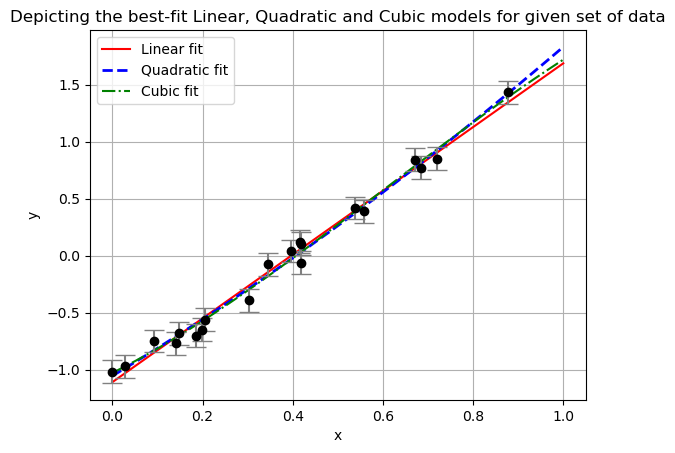

In [11]:
opt_linear_param , _ = sp.optimize.curve_fit(linear_fit , x , y , sigma = sigma_y)
opt_quadratic_param , _ = sp.optimize.curve_fit(quadratic_fit , x , y , sigma = sigma_y)
opt_cubic_param , _ = sp.optimize.curve_fit(cubic_fit , x , y , sigma = sigma_y)

print("The best fit parameters for (mx + b) are {}".format(opt_linear_param))
print("The best fit parameters for (ax^2 + bx + c) are {}".format(opt_quadratic_param))
print("The best fit parameters for (ax^3 + bx^2 + cx + d) are {}".format(opt_cubic_param))
print("\n")

# printing the Chi-square likelyhoods
print("The chi-square likelyhood for the linear fit is {}".format(chi_likelyhood(opt_linear_param , x , y , sigma_y)))
print("The chi-square likelyhood for the quadratic fit is {}".format(chi_likelyhood(opt_quadratic_param , x , y , sigma_y)))
print("The chi-square likelyhood for the cubic fit is {}".format(chi_likelyhood(opt_cubic_param , x , y , sigma_y)))
print("\n")
print("Since the likelyhood of seeing the data given the linear model is maximum, the linear model is favoured.")

# print the AIC and BIC values
print("The AIC value for the linear fit is {}".format(AIC(opt_linear_param , x , y , sigma_y)))
print("The AIC value for the quadratic fit is {}".format(AIC(opt_quadratic_param , x , y , sigma_y)))
print("The AIC value for the cubic fit is {}".format(AIC(opt_cubic_param , x , y , sigma_y)))
print("\n")
print("The BIC value for the linear fit is {}".format(BIC(opt_linear_param , x , y , sigma_y)))
print("The BIC value for the quadratic fit is {}".format(BIC(opt_quadratic_param , x , y , sigma_y)))
print("The BIC value for the cubic fit is {}".format(BIC(opt_cubic_param , x , y , sigma_y)))
print("\n")
print("The minimum AIC and BIC values point to the linear model.")
print("\n")


# treating the linear model as null hypothesis, we find the p-values for quadratic and cubic models
print("The p-value of the quadratic model wrt linear model is {}".format(pvalue(opt_quadratic_param , opt_linear_param , x , y , sigma_y)))
print("The p-value of the cubic model wrt linear model is {}".format(pvalue(opt_cubic_param , opt_linear_param , x , y , sigma_y)))
print("The high values mean the models are very similar.")

# plotting the data
x_plot = np.linspace(0, 1, 2500)
# plt.plot(x , y , 'mo',label = "Data points")
plt.plot(x_plot , y_predict(opt_linear_param , x_plot) , 'r-',label = "Linear fit")
plt.plot(x_plot , y_predict(opt_quadratic_param , x_plot) , 'b--' , linewidth = 2 ,label = "Quadratic fit")
plt.plot(x_plot , y_predict(opt_cubic_param , x_plot) , 'g-.',label = "Cubic fit")
plt.errorbar(x, y, yerr = sigma_y , fmt = 'ko', ecolor = 'gray' , capsize = 7)
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Depicting the best-fit Linear, Quadratic and Cubic models for given set of data")
plt.legend()


plt.show()

**Question 2**

For the model comparision problem in JVDP's blog, find the AIC and BIC for the linear and quadratic model. Mention the qualitative significance using strength of evidence rules.

Link : http://jakevdp.github.io/blog/2015/08/07/frequentism-and-bayesianism-5-model-selection/

In [12]:
# data from JDVP

data = np.array([[ 0.42,  0.72,  0.  ,  0.3 ,  0.15,
                   0.09,  0.19,  0.35,  0.4 ,  0.54,
                   0.42,  0.69,  0.2 ,  0.88,  0.03,
                   0.67,  0.42,  0.56,  0.14,  0.2  ],
                 [ 0.33,  0.41, -0.22,  0.01, -0.05,
                  -0.05, -0.12,  0.26,  0.29,  0.39, 
                   0.31,  0.42, -0.01,  0.58, -0.2 ,
                   0.52,  0.15,  0.32, -0.13, -0.09 ],
                 [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1  ]])
x, y, sigma_y = data

In [13]:
# finding the best fit
opt_linear_param , _ = sp.optimize.curve_fit(linear_fit , x , y , sigma = sigma_y)
opt_quadratic_param , _ = sp.optimize.curve_fit(quadratic_fit , x , y , sigma = sigma_y)

# finding the AIC and BIC
print("The AIC value for the linear fit is {}".format(AIC(opt_linear_param , x , y , sigma_y)))
print("The AIC value for the quadratic fit is {}".format(AIC(opt_quadratic_param , x , y , sigma_y)))
print("\n")
print("The BIC value for the linear fit is {}".format(BIC(opt_linear_param , x , y , sigma_y)))
print("The BIC value for the quadratic fit is {}".format(BIC(opt_quadratic_param , x , y , sigma_y)))
print("\n")
print("Both the AIC and BIC values agree with the linear model, which validates JVDP's blog.")
print("\n")
print("According to the strength of the evidence, delta_AIC = {} and delta_BIC = {}, which says the quadratic model is not very favoured.".\
    format(AIC(opt_quadratic_param , x , y , sigma_y) - AIC(opt_linear_param , x , y , sigma_y) , \
        BIC(opt_quadratic_param , x , y , sigma_y) - BIC(opt_linear_param , x , y , sigma_y)))

The AIC value for the linear fit is -40.02173401322528
The AIC value for the quadratic fit is -39.883027173008216


The BIC value for the linear fit is -38.030269466117296
The BIC value for the quadratic fit is -36.895830352346245


Both the AIC and BIC values agree with the linear model, which validates JVDP's blog.


According to the strength of the evidence, delta_AIC = 0.13870684021706126 and delta_BIC = 1.1344391137710517, which says the quadratic model is not very favoured.


**Question 3**

Find one paper that used the Kolmogorov-Smirnov Test and how it was used in the paper. Is the KS test used incorrectly as per the warnings on the Penn State University Website?

Answer:

https://arxiv.org/pdf/2211.00578.pdf

The paper uses both the one-sample and two-sample KS tests. The one-sample KS test is used to figure out if the uncertanities in the Hubble constant can be modeled using a Gaussian Distribution. This does not violate the Penn State University warning as the constant is a one dimensional sample. Moreover, they also use the two-sample KS test to find which of the anchor galaxies are different from the others, if any, and use the results to improvise on their results.

**Question 4**

Calculate the significance in terms of no of sigmas of the Higgs boson
discovery claim from the p value given in the abstract of the ATLAS
discovery paper, arXiv:1207.7214.


Do the same for the LIGO discovery of GW150914, for which the p
value = 2 × $10^{-7}$


From the Super-K discovery paper for neutrino oscillations (hep-
ex/9807003), calculate the $\chi^2$ GOF using the best-fit $\nu_\mu \leftrightarrow \nu_\tau$  oscillation solution.

In [14]:
# Higgs boson discovery
p_vals = [10**-1, 10**-2, 10**-3, 10**-5, 10**-7, 10**-9]

print("The corresponding p-values and significance levels (in terms of sigma) are: ")
for p in p_vals:
    print("p-value = {} significance level = {}".format(p , sp.stats.norm.isf(p)))

The corresponding p-values and significance levels (in terms of sigma) are: 
p-value = 0.1 significance level = 1.2815515655446004
p-value = 0.01 significance level = 2.3263478740408408
p-value = 0.001 significance level = 3.090232306167813
p-value = 1e-05 significance level = 4.264890793922825
p-value = 1e-07 significance level = 5.1993375821928165
p-value = 1e-09 significance level = 5.9978070150076865


In [15]:
# LIGO discovery
print("The significance level of the LIGO discovery for p--value = 2 * 10^-7 in terms of sigma is {} "\
    .format(sp.stats.norm.isf(2 * 10**(-7))))

The significance level of the LIGO discovery for p--value = 2 * 10^-7 in terms of sigma is 5.068957749717791 


In [16]:
# Super K-discovery paper
chi_square = 65.2

# dof
dof = 67

print("The chi-square GOF is given by {}".format(1 - sp.stats.chi2(dof).cdf(chi_square)))

The chi-square GOF is given by 0.5394901931099038
